# <center> Curso Machine Learning e Imágenes en Python 2020
    
* Docentes:  Dra. Valeria S. Rulloni - Dra. Ana Carolina Maldonado
* Ing. Axel Aguerreberry -  Ing. Sebastián Palacio
* Colaborador: Ing. Juan Manuel López


## Temario a desarrollar:
*	**Uso y herramientas básicas de Python**
*	**Imágenes digitales: tipos (binarias, monocromáticas y a color)**
*	Histograma. Mejora de la imagen: contraste, filtros: suavizado y detección de bordes.
*	Umbralado y Binarización. Operaciones Morfológicas: erosión, dilatación, cierre y apertura.
*	Aplicaciones
*	Clasificación de imágenes.
*	Aprendizaje automático
*	Aprendizaje profundo: Redes neuronales
*	Aplicaciones 


**Recomendación:**
+ Antes que nada **realice una copia de este archivo y trabaje en ella** (File-> Make a Copy, puede cambiarle el nombre fácilmente). Guárdelo en la misma carpeta de preferencia (si está en Colaboratory lo guarda por defecto en la carpeta Colaboratory del drive, se puede reubicar).

**CLASE 2: 14-09-2020** 
    
archivos necesarios para la notebook: 'lenna.jpg', 'daisy.jpg', 'image_dfl.dcm','SYN00004' ,'000000' y 'ortopantomografia2.png'
    
**Imágenes: Conceptos Básicos**


Podemos definir una **imagen** como una función o arreglo bidimensional  f(x1,x2)  donde  x=(x1,x2)  son las coordenadas espaciales, y el valor de  f  en cualquier  x  es la intensidad de la imagen en dicho punto, si es en grises o binaria.


* El **tamaño de la imagen**: Si es monocroma (en grises) o binaria es el número de filas por el número de columnas,  M×N. Cada punto corresponde a un píxel. 


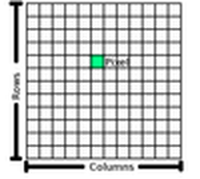

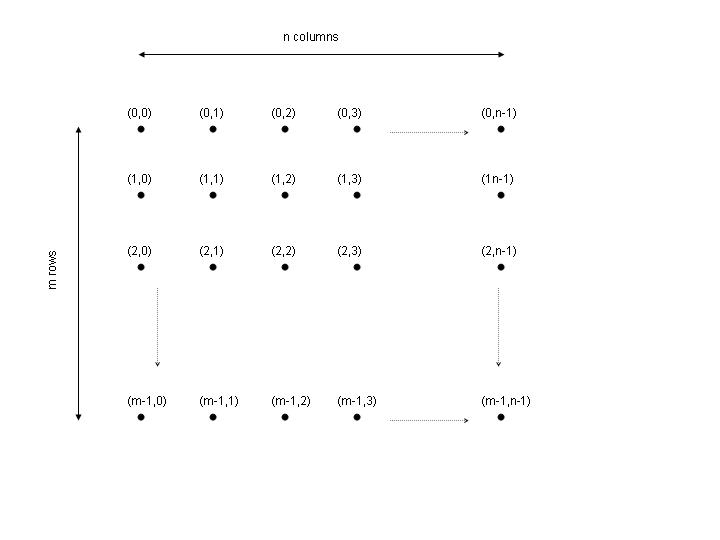

La indexación de la imagen en Python sigue la convención habitual de matrices, primero fila y luego columna, pero comenzando en 0.

En el caso de imágenes en gris (monocroma), al pixel le corresponde un número que es el valor de intensidad I(x,y), en la coordenada/lugar (x,y)

Si la intensidad se almacena como entero sin signo de 8 bits (uint8), su valor pertenece al intervalo [0 255].
        0 corresponde al negro                   255 corresponde al blanco.

Si la intensidad se almacena como entero de 16 bits (uint16) significa que pertenece al intervalo [0 65535], ya que corresponde a un entero sin signo de 16 bits.

Si la imagen es binaria, la intensidad toma solo los valores 0 o 1.

La coordenada (0,0) corresponde a la esquina superior izquierda de la imagen.
La coordenada (M-1, N-1) a la esquina inferior derecha.

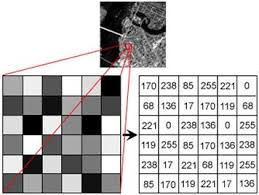

# 1. Generar imágenes usando arreglos/matrices

Generar imágenes con numpy y mostrarlas con imshow de matplotlib.pyplot


## 1.1 Imágenes binarias y monocromas (arreglos 2D)
### Ejemplos

**Generar una cruz (negra,  valores 0) con fondo blanco (valor 1) de tamaño 192x192. Utilizar la función concatenar**


In [ ]:
import numpy as np

negro=np.zeros((64,64))
blanco=negro+1

arriba=np.concatenate((blanco,negro,blanco),axis=1)

cruz=np.concatenate((arriba, np.zeros((64,192)),arriba),axis=0)

print(cruz.shape)

#### Graficamos el arreglo generado con imshow de matplotlib 

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cruz, cmap='gray')
plt.show()

In [ ]:
#Variante
import numpy as np
cruz2=np.ones((192,192))
cruz2[:,64:129]=0
cruz2[64:129,:]=0
print(cruz2.shape)

#### Ejercicio: mostrar el arreglo cruz2

#### Ejercicio: Invertir blanco y negro en la imagen anterior y mostrarla

#### Ejercicio: Generar un damero (tablero) con 24 cuadrados de 8x8 y mostrarlo

#### Ejemplo: Crear imagen monocroma (un solo canal, en grises) 64x64 con intensidad creciente

In [ ]:
#Creación con numpy y for
import numpy as np
arr_2D=np.zeros((64,64))
print(type(arr_2D[0,0]))
print(arr_2D)
c=np.arange(64)#/64
for i in c: 
    arr_2D[i,:]=c #en cada fila intensidad creciente numéricamente
    
print(arr_2D)
print("dimensiones",np.shape(c),"y", np.shape(arr_2D), ' es decir, c es 1D y arr_2D es 2D')

In [ ]:
#Otra variante sólo con numpy (sin for es más rápido computacionalmente)
import numpy as np
v1=np.ones((64,1)) #dim: 64x1
v2=np.ones((1,64)) #dim: 1x64 (2D)
v2[0]=np.arange(64) #dim: 64 (1D)
#v2[0,:]=np.arange(64) #dim: 64 (1D) #es equivalente, primera fila, todas las columnas

arr_2D=np.dot(v1,v2) #dim: 64x64 (2D)

print(type(arr_2D[0,0]))
print(arr_2D)

print("dimensiones", np.shape(arr_2D))

In [ ]:
#Muestra con matplotlib varias imágenes juntas
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(10)

axs[0].imshow(arr_2D, cmap='gray')# ojo con la visualización de los datos si no fijamos rango [0,256]
axs[0].set_title("minimo(0) negro, máximo (63) blanco")

axs[1].imshow(arr_2D, cmap='gray',vmin=0 ,vmax=255) #ojo con la visualización de los datos
axs[1].set_title("0 negro, 255 blanco")
plt.show()
print('CUIDADO: Hay que estar atentos a la visualización de los datos')

In [ ]:
#Creación nan con numpy
import numpy as np
arr_2D[:] = np.nan
print(type(arr_2D[0,0]))
print(arr_2D)

In [ ]:
#El contador c puede no ser vector. #Cambia el for
c=range(64)#/ contador tipo lista de números
for i in c: 
    arr_2D[i,:]=i #en cada fila i intensidad constante i
    
print(arr_2D)
print("dimensiones",np.shape(c),"y", np.shape(arr_2D))

In [ ]:
#Muestra con matplotlib
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(10)
axs[0].imshow(arr_2D, cmap='gray')# ojo con la visualización de los datos si no fijamos rango [0,256]
axs[0].set_title("minimo(0) negro, máximo (63) blanco")
axs[1].imshow(arr_2D, cmap='gray',vmin=0 ,vmax=255) #ojo con la visualización de los datos
axs[1].set_title("0 negro, 255 blanco")
plt.show()

**Opcional:**

In [ ]:
import numpy as np
arr_2D=np.empty((64,64))
print(type(arr_2D[0,0]))
print(arr_2D)

## 1.2. Imágenes 3D: RGB 

En el caso de imágenes en color vamos a considerar el formato RGB (3 canales). También veremos imágenes satelitales (varios canales/bandas).

* Si es en color hay 3 valores de intensidad, uno por cada canal: R, G y B (red, green, blue).
* Si es imagen satelital hay tantos valores como bandas o canales tenga la imagen (depende de la cantidad de sensores del satélite).

Para RGB, el tamaño del array será MxNx3. almacenando así en cada posición x,y la intensidad de cada canal R, G y B. La intensidad del rojo (R) estará en el lugar (x,y,1), la intensidad del verde (G) estará en (x,y,2) y, por último la del azul (B) estará en (x,y,3). 

* El **tamaño de la imagen**:  Si es a color RGB, es MxNx3. Si es salelital: MxNxk donde k es la cantidad de bandas (espectrales).

#### Ejercicio: Construir y mostrar una imagen a colores 256x256 píxeles.
* **Ultimas 128 columnas color azul y**
* **Primeras 128 columnas, en todas las filas, rojo creciente y verde decreciente**

In [ ]:
import numpy as np

arr_image=np.zeros((256,256,3),'uint8') #3D, la tercera dimensión tiene 3 opciones: p/R, p/G y p/B
print(type(arr_image[0,0,0])) 

In [ ]:
c=np.arange(256) # c=[0, ...,255] vector creciente

for i in c[0:128]: #esta variable maneja las columnas, consideramos las primeras 128 columnas
    arr_image[:,i,0]=c #rojo creciente en la i-ésima columna
    arr_image[:,i,1]=(255-c) #verde decreciente en la i-ésima col (255-c)=[255,...,0]

arr_image[:,128:,2]=255 #(solo) azul en las últimas columnas

print("R-rojo:")
print( arr_image[:,:,0])
print("G-verde:")
print( arr_image[:,:,1])
print("B-azul:")
print( arr_image[:,:,2])


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(arr_image)

plt.show()

#### Ejercicio: Crear y mostrar una imagen 256x256, dividida en 4 cuadrados, cada uno de otro color.

# 2 Imágenes de archivos, librerías:

Hay varias librerías para el manejo de imágenes en Python, algunas tareas son compartidas aunque en general cada librería tiene su especialidad.
Las librerías que utilizaremos serán:

**PILOW**

**OpenCV**

**SimpleITK**


La librería histórica es la **PIL (Python Image Library)**. Esta tiene un submódulo Image que antes era independiente, por eso es necesario indicarlo. Python no importa automáticamente los submódulos.
Actualmente la librería es la Pillow, pero se maneja igual.

**from PIL import Image**

o

**import PIL.Image**


- La librería PIL (PILLOW es una nueva versión más "friendly") permite cargar la imagen en memoria. Para manipular numéricamente los valores de intensidad es necesario convertirla en array con la librería numpy. 
- La librería SimpleITK también carga una imagen que es necesario convertir en array para manipularla, pero tiene una función propia para hacerlo.
- La librería OpenCV lleva la imagen a memoria directamente como matriz. Su tipo es ndarray.



**Observación** Será necesario instalar las librerías. POR ÚNICA VEZ, ANTES DE CLASE. 

Desde Anaconda Promp (Anaconda Navigator: CMD.exe Prompt abre una consola), en la consola:

**conda install nombre_paquete**

conda install pillow

conda install opencv

conda install simpleitk


## 2.1 Librería PIL o PILLOW: submódulo Image
**Verificamos la versión instalada:**

In [ ]:
#PIL Python Image Library
import PIL
print(PIL.__version__) #verificamos la versión instalada

In [ ]:
from PIL import Image  #solo importaremos Image de PIL

#Funciones: Image.open() #Carga la imagen (de archivo) en memoria
I=Image.open('lenna.jpg') 
#Siempre para abrir una imagen de archivo, tenemos que estar ubicados en la carpeta donde tenemos 
#la imagen o bien conocer el Path completo de su ubicación 

print("El tamaño de la imagen es",I.size)#imprime tamaño
print("El modo de la imagen es", I.mode) #indica si es en color, o gris
print("El tipo de imagen es",I.format) #Si es png, pgm, jpg, etc.

I.show() #muestra la imagen original abriendo otra pantalla/ventana. Función propia de PIL

**Pasamos a Monocroma (grises), modo L**

ver: https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

los que usaremos son modo L (monocroma) y modo RGB 

más adelante usaremos modo RGBA (RGB con una transparencia) 

In [ ]:
#continuación: 
Igris=I.convert('L') #Convierte la imagen en gris. En este ejemplo se la guarda en otra variable

print ("\nEl tamaño de la imagen en gris es ",Igris.size,"\nEl modo de la imagen en gris es ",Igris.mode,
       "\nEl formato de la imagen en gris es", Igris.format, ' sólo está en memoria') 

Igris.show() #muestra la imagen gris
#ver ventanas emergentes

### Guardamos la imagen a Memoria

In [ ]:
Igris.save('lenagris.png') #Graba la imagen creada. Función propia de PIL

### Correr Kernel-Restart and Clear Output para verificar que se grabó la imagen (observar la carpeta)

In [2]:
#Correr Kernel-Restart and Clear Output para verificar que se grabó la imagen (observar la carpeta)
from PIL import Image
Ig=Image.open('lenagris.png') #Traemos a memoria la imagen grabada
print("El tamaño es ",Ig.size,". El modo es ",Ig.mode,". El formato es", Ig.format)
Ig.show()


El tamaño es  (512, 512) . El modo es  L . El formato es PNG


**Como se dijo para poder manipular numéricamente los valores de intensidad es necesario usar la librería numpy. Para eso se debe convertir la imagen en un array.**

**Abrimos con Image de PIL, pasamos a numpy y graficamos con imshow de matplotlib.pyplot


las dimensiones del arreglo son  (512, 512, 3) es RGB


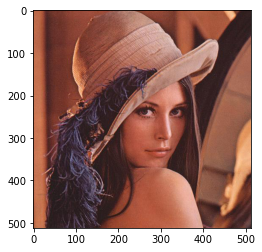

In [7]:
#from PIL import Image
import numpy as np #me permite convertir imagen a array y manipular numéricamente las intensidades
from matplotlib.pyplot import imshow #solo importamos imshow

I=Image.open('lenna.jpg')
array_3D=np.array(I)
print('las dimensiones del arreglo son ', array_3D.shape, 'es RGB')
imshow(array_3D) #para graficar convierte I en array, imshow (función del matplotlib) 
#imshow muestra en la misma página. Si no muestra la imagen, correrlo nuevamente

In [10]:
#Al transformar la imagen en array con numpy se puede fijar el tipo de dato (opcional)
I_array=np.array(I,dtype=np.float32) # np.array por defecto hace una copia en este caso en I_array
#I_array=np.array(I,'float32')

#La imagen tiene "atributos" size, mode y format
print("Para la imagen el tamaño es ",I.size,", el modo es ",I.mode," y el formato es", I.format)

print("Para el array, size da la cantidad de píxeles: ",I_array.size," y shape da las dimensiones:",
      I_array.shape)

print("Tipo de datos del array: ", I_array.dtype)

#Se puede llevar nuevamente el array a imagen y grabarla
I_nueva=Image.fromarray(I_array.astype(np.uint8)) #y se la cambia de tipo de dato a uint8 (usual en imágenes)
I_nueva.save('prueba.jpg')

Para la imagen el tamaño es  (512, 512) , el modo es  RGB  y el formato es JPEG
Para el array, size da la cantidad de píxeles:  786432  y shape da las dimensiones: (512, 512, 3)
Tipo de datos del array:  float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cuidado con la pérdida de datos por la compresión jpg, ver tamaño de "prueba.jpg" y de "lenna.jpg" 
máxima diferencia:  34.0


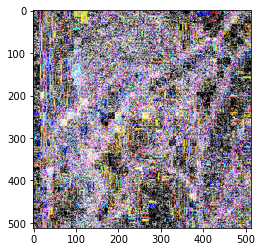

In [11]:
I_nueva2=Image.open('prueba.jpg')
I_nueva2_array=np.array(I_nueva2,dtype=np.float32)
imshow(abs(I_nueva2_array-I_array))
print('Cuidado con la pérdida de datos por la compresión jpg, ver tamaño de "prueba.jpg" y de "lenna.jpg" ')
print('máxima diferencia: ',abs(I_nueva2_array-I_array).max())

**Para visualizar múltiples imágenes convertidas en array usamos imshow de matplotlib.pyplot**

**Si hemos limpiado la memoria, volvemos a importar las librerías y módulos**

(354, 364, 3) uint8


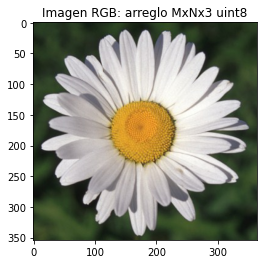

In [17]:
from PIL import Image
import numpy as np

I=Image.open('daisy.jpg')
#I_array_3D=np.array(I,dtype=np.float32)
I_array_3D=np.array(I)
print(I_array_3D.shape, I_array_3D.dtype)
import matplotlib.pyplot as plt
#En este caso importamos matplotlib.pyplot con el alias plt
#para mostrar la imagen se usará plt.imshow()
plt.imshow(I_array_3D)
plt.title('Imagen RGB: arreglo MxNx3 uint8')
plt.show()

**Separamos cada componente**

dimensiones de la componente roja (monocroma) = (354, 364)


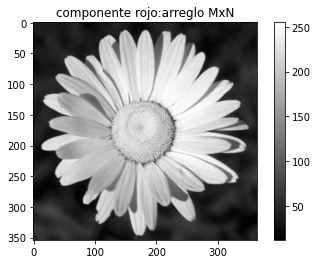

dimensiones de la componente verde (monocroma) = (354, 364)


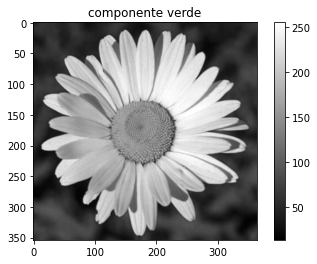

dimensiones de la componente roja (monocroma) = (354, 364)


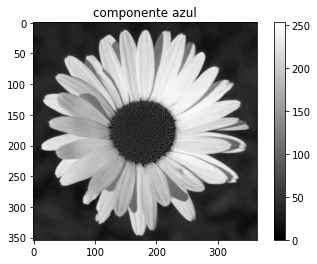

In [20]:
rojo2D=I_array_3D[:,:,0]
print("dimensiones de la componente roja (monocroma) =" , rojo2D.shape)
plt.imshow(rojo2D, cmap='gray')
plt.title('componente rojo:arreglo MxN')
plt.colorbar()
plt.show()

verde2D=I_array_3D[:,:,1]
print("dimensiones de la componente verde (monocroma) =" , verde2D.shape)
plt.imshow(verde2D, cmap='gray')
plt.title('componente verde')
plt.colorbar()
plt.show()

azul2D=I_array_3D[:,:,2]
print("dimensiones de la componente roja (monocroma) =" , azul2D.shape)
plt.imshow(azul2D, cmap='gray')
plt.title('componente azul')
plt.colorbar()
plt.show()


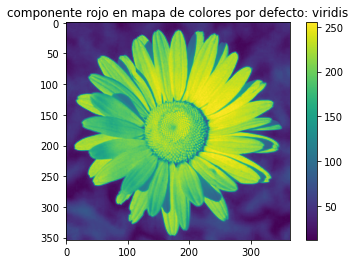

In [21]:
plt.imshow(rojo2D)
plt.title('componente rojo en mapa de colores por defecto: viridis')
plt.colorbar()
plt.show()

**Cuando sea necesario**

**activar: Kernel -> Restart & Clear Output**

**Considerando que hay que volver a importar las librerías necesarias**

## 2.2 Librería SimpleITK
**Otra librería para manipulación y procesado de imágenes es SimpleITK.** 

In [ ]:
#por única vez en CMD: conda install -c simpleitk simpleitk

In [1]:
import SimpleITK as sitk #http://simpleitk.github.io/SimpleITK-Notebooks/01_Image_Basics.html

#### Abrir una imagen con SimpleITK
Para abrir una imagen, tenemos que estar ubicados en la carpeta donde tenemos la imagen o bien conocer el Path completo de su ubicación

In [2]:
import SimpleITK as sitk 
path="lenna.jpg" #nombre de la imagen (y ubicación, si está ubicada en otra carpeta)
ima=sitk.ReadImage(path) #lee el archivo y genera una variable TIPO IMAGEN
ima_arr = sitk.GetArrayFromImage(ima) #variable TIPO ARREGLO (3D)
print("La imagen", path)
print("es una imagen de tamaño",ima_arr.shape)
print("tipo de dato",type(ima_arr))


La imagen lenna.jpg
es una imagen de tamaño (512, 512, 3)
tipo de dato <class 'numpy.ndarray'>


#### Mostrar la imagen
 
 se puede usar sitk.Show(ima) si se tiene Fiji ( https://fiji.sc ) or ImageJ instalado correctamente en la compu
 
 sino se puede usar librería matplotlib

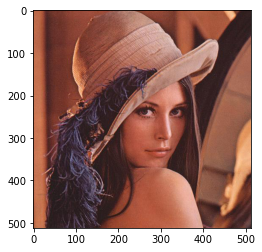

In [3]:
#sitk.Show(ima) #help(sitk.Show) #This function requires that Fiji ( https://fiji.sc ) or ImageJ ( http://rsb.info.nih.gov/ij/) 
#be properly installed for Mac and Windows
import matplotlib.pyplot as plt
#se grafica usando el TIPO ARREGLO (3D)que en este caso se consiguió con la función de SimpleITk
#ima_arr = sitk.GetArrayFromImage(ima) 
plt.imshow(ima_arr)
plt.show()
#Responde en segunda orden


#### Ejercicio librería SimpleITK:
Abrir y graficar una imagen a elección (puede ser la imagen "daisy.jpg") Ayuda:sitk.ReadImage, sitk.GetArrayFromImage y plt.imshow

La imagen daisy.jpg
es una imagen de tamaño (354, 364, 3)
tipo <class 'numpy.ndarray'>


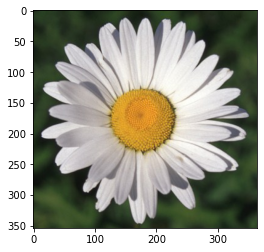

In [4]:
import SimpleITK as sitk 
path="daisy.jpg" #nombre de la imagen (y ubicación, si está ubicada en otra carpeta)
ima=sitk.ReadImage(path) #lee el archivo y genera una variable TIPO IMAGEN
ima_arr = sitk.GetArrayFromImage(ima) #variable TIPO ARREGLO (3D)
print("La imagen", path)
print("es una imagen de tamaño",ima_arr.shape)
print("tipo",type(ima_arr))
#sitk.Show(ima) #help(sitk.Show) #This function requires that Fiji ( https://fiji.sc ) or ImageJ ( http://rsb.info.nih.gov/ij/) 
#be properly installed for Mac and Windows
import matplotlib.pyplot as plt
#se grafica usando el TIPO ARREGLO (3D)que en este caso se consiguió con la función de SimpleITk
#ima_arr = sitk.GetArrayFromImage(ima) 
plt.imshow(ima_arr)
plt.show()
#Responde en segunda orden

dimensiones de imagen a color R-G-B = (354, 364, 3)
dimensiones de la componente roja (monocroma) = (354, 364)


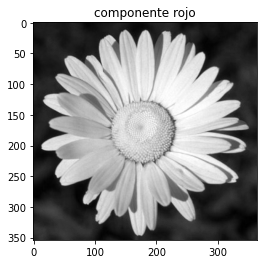

In [5]:
##Repetimos mostrando solo la componente roja

import SimpleITK as sitk 
path="daisy.jpg" #nombre de la imagen (y ubicación, si está ubicada en otra carpeta)
ima=sitk.ReadImage(path) #lee el archivo y genera una variable TIPO IMAGEN
ima_arr = sitk.GetArrayFromImage(ima) #variable TIPO ARREGLO (3D)
print("dimensiones de imagen a color R-G-B =" , ima_arr.shape)

import matplotlib.pyplot as plt 
#%matplotlib inline
rojo=ima_arr[:,:,0]
print("dimensiones de la componente roja (monocroma) =" , rojo.shape)
plt.imshow(rojo, cmap='gray')
plt.title('componente rojo')
plt.show()

#### Uso de cmap (Color Map) o paleta de colores

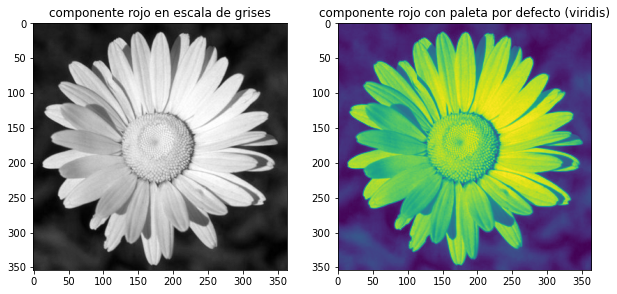

In [6]:
#Continúa el ejemplo anterior

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
fig.set_figheight(8)
fig.set_figwidth(10)
axs[0].imshow(rojo, cmap='gray')
axs[0].set_title('componente rojo en escala de grises')
axs[1].imshow(rojo) 
axs[1].set_title('componente rojo con paleta por defecto (viridis)')
plt.show()

![](paleta1.png)
![](paleta3.png)

https://matplotlib.org/examples/color/colormaps_reference.html

dimensiones de imagen monocroma  (R+G+B)/3= (354, 364)


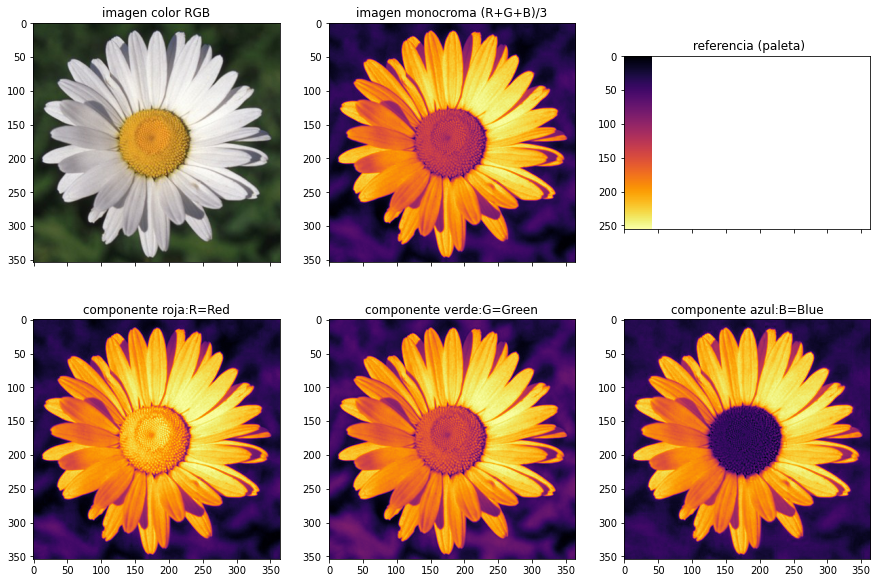

In [18]:
#Continúa el ejemplo anterior
#Mostrar las componentes verde y azul

import numpy as np
verde=ima_arr[:,:,1]
azul=ima_arr[:,:,2]
    
monocroma=np.mean(ima_arr,axis=2) #intensidad monocroma=(rojo+verde+azul)/3
print("dimensiones de imagen monocroma  (R+G+B)/3: " , monocroma.shape)

#para mostrar gráfico de paleta
l=np.linspace(0,ima_arr.max(),256)#vector de intensidades
l=l.astype('uint8')

tr=np.zeros((256,40),'uint8')
for i in range(40):
    tr[:,i]=l

paleta='inferno'

fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
axs[0,0].imshow(ima_arr ,cmap=paleta)
axs[0,0].set_title("imagen color RGB")
axs[0,1].imshow(monocroma ,cmap=paleta)
axs[0,1].set_title("imagen monocroma (R+G+B)/3")
axs[0,2].imshow(tr,cmap=paleta)
axs[0,2].set_title(" referencia (paleta)")
axs[1,0].imshow(rojo ,cmap=paleta)
axs[1,0].set_title("componente roja:R=Red")
axs[1,1].imshow(verde ,cmap=paleta)
axs[1,1].set_title("componente verde:G=Green")
axs[1,2].imshow(azul ,cmap=paleta)
axs[1,2].set_title("componente azul:B=Blue")
plt.show()

### Abrimos una imagen DICOM con SimpleITK

In [23]:
import matplotlib.pyplot as plt
import SimpleITK as sitk 
path="image_dfl.dcm" #imagen de muestra 
#path="SYN00004" #mamografía 
#path="000000.dcm" #mamografía base DDSM
imagen=sitk.ReadImage(path)
print(type(imagen))

<class 'SimpleITK.SimpleITK.Image'>


In [20]:
array_imagen = sitk.GetArrayViewFromImage(imagen) #devuelve un array de 3D (1,...)
print(type(array_imagen))
print(array_imagen.shape)

<class 'numpy.ndarray'>
(1, 512, 512)


<class 'numpy.ndarray'>
(512, 512)
Valor máximo para uint16 2^16-1:  65535
valor de un pixel: 41  tipo de dato en el pixel:  <class 'numpy.uint8'>


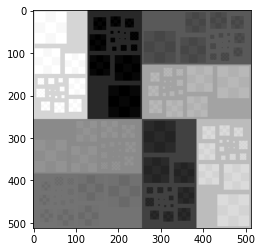

In [21]:
array2_imagen=array_imagen[0,:,:] #quitamos la primera "dimensión"
print(type(array2_imagen))
print(array2_imagen.shape)
print('Valor máximo para uint16 2^16-1: ',2**16-1)
if path=="image_dfl.dcm" :
    print('valor de un pixel:', array2_imagen[100,250], ' tipo de dato en el pixel: ', type(array2_imagen[100,250]))
else :
    print('valor de un pixel en el lugar [1000,2500]:', array2_imagen[1000,2500], '; tipo de dato en el pixel: ', type(array2_imagen[1000,2500]))
    print('valor de un pixel en el lugar [1500,500]:', array2_imagen[1500,500])
plt.imshow(array2_imagen,cmap="gray")
plt.show()

In [30]:
#instalar por única vez en Prompt: conda install -c conda-forge pydicom
import pydicom
ds = pydicom.dcmread(path,force=True)
print('Nombre del paciente: ',ds.PatientName)
#print(ds.walk)
print(ds)

Nombre del paciente:  ^^^^
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 190
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.0.0.0.977067309.6001.0
(0002, 0010) Transfer Syntax UID                 UI: Deflated Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.5962.1.1.0.0.0.977067309.6001.0
(0008, 0020) Study Date                          DA: ''
(0008, 0030) Study Time                    

## 2.3 Librería OpenCV: cv2
La librería clásica por excelencia para el procesamiento de imágenes y visión por computadora es OpenCV (Computer Vision)
Para poder utilizarla en Python primero hay que instalarla:

In [26]:
import cv2
cv2.__version__
#'4.0.1'

'4.0.1'

Si es necesario hay que "matar" el kernel:

In [ ]:
#clear kernel
#Kernel - Restart & Clear Output

Recordar que para abrir una imagen, tenemos que estar ubicados en la carpeta donde tenemos la imagen o bien conocer el Path completo de su ubicación

### Cargar imagen en memoria con OpenCV

In [1]:
#Los canales de colores en OpenCV son BGR!Cuidado!
import cv2
Imagen=cv2.imread('lenna.jpg')
#Igris = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE #para guardarla convertida a gris
#I_rgb = cv2.cvtColor(Imagen, cv2.COLOR_BGR2RGB)
#I_rgb = Imagen[:, :, [2, 1, 0]]#También se puede convertir de esta forma
print("El tipo de la primer imagen es ",type(Imagen))
print("El tipo de cada píxel es ",type(Imagen[1,1,1]))
print("La dimensión de la imagen es ",Imagen.shape)

#A partir de shape podemos tomar variables con nombres más significativos
altura=Imagen.shape[0]
ancho=Imagen.shape[1]
canales=Imagen.shape[2]

print("La altura es",altura,".El ancho es ",ancho,".Los canales de color son ",canales)

Imagen2=cv2.imread('ortopantomografia2.png')
print("\nEl tipo de la segunda imagen es ",type(Imagen2))
print("El tipo de cada píxel es ",type(Imagen2[1,1,1]))
print("La dimensión de la imagen es ",Imagen2.shape)

El tipo de la primer imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (512, 512, 3)
La altura es 512 .El ancho es  512 .Los canales de color son  3

El tipo de la segunda imagen es  <class 'numpy.ndarray'>
El tipo de cada píxel es  <class 'numpy.uint8'>
La dimensión de la imagen es  (267, 438, 3)


### Graficar ambas imágenes:
**Luego de correr el siguiente bloque, VER Ventana emergente, NO DEBE CERRARSE LA VENTANA EMERGENTE, ya que en ese caso no responde al pulsado posterior y no continúa la ejecución. pulse una tecla sobre ella para ver la imagen siguiente, pulse tecla nuevamente sobre la imagen para cerrar la visualización**

In [3]:
cv2.imshow('Pulse tecla para cambiar de imagen',Imagen)
cv2.waitKey(0) #espera pulsado tecla
#No debe cerrarse la ventana ya que en ese caso no responde al pulsado posterior
#y no continúa la ejecución
cv2.destroyAllWindows() 
cv2.imshow('Pulse tecla otra vez para cerrar',Imagen2)
cv2.waitKey(0) #espera pulsado tecla
cv2.destroyAllWindows() 

# 3 Conceptos y operaciones en imágenes
## 3.1 Resolución de una imagen
**Resolución** de la imagen: dada por la cantidad de píxeles (concepto simple, usual). 

Pero el concepto es más completo, existen otros tipos de Resolución: 

- **Resolución Espectral**: Dada por la cantidad de bandas o canales de la imagen (monocroma, RGB, hiperespectrales, etc)

- **Resolución Espacial**: Asociada a la cantidad de pixeles también pero también se considera la representación espacial de cada pixel en la escena que está representando (escala). A modo de ejemplo, en imágenes satelitales: Sentinel tiene algunas bandas con resolución de 10 metros, es decir cada pixel representa una porción del terreno de 10mx10m;  en imágenes microscópicas pueden ser en micrómetros, asociadas al aumento (5x,10x, etc.).

- **Resolución Radiométrica**: la cantidad de niveles de gris de cada banda, asociada al tipo de dato con que se guarda cada pixel o a la sensibilidad del sensor con que fue tomada la imagen.

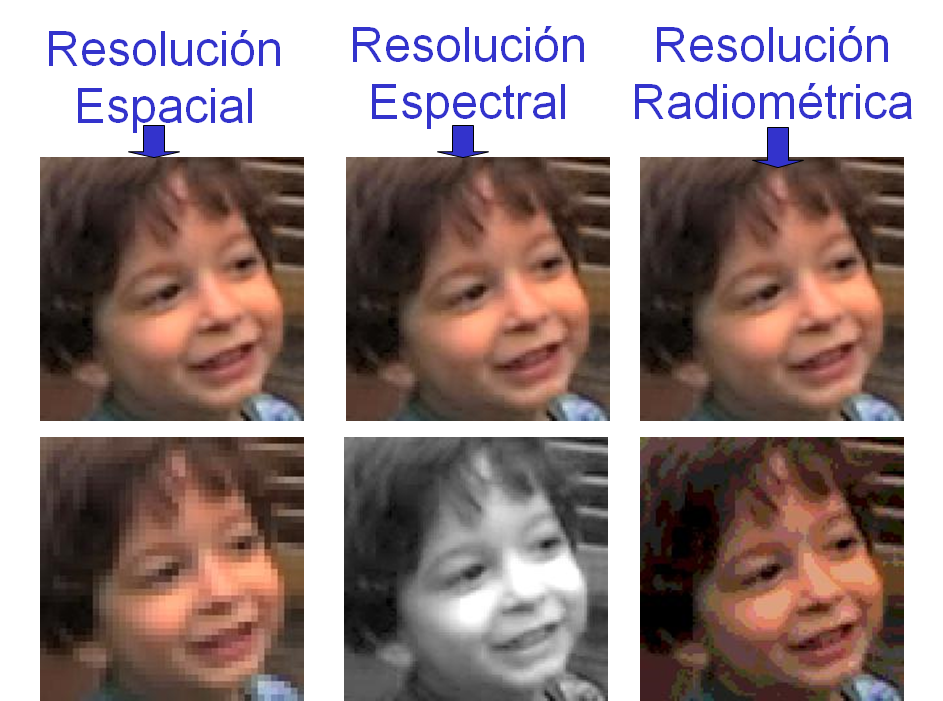

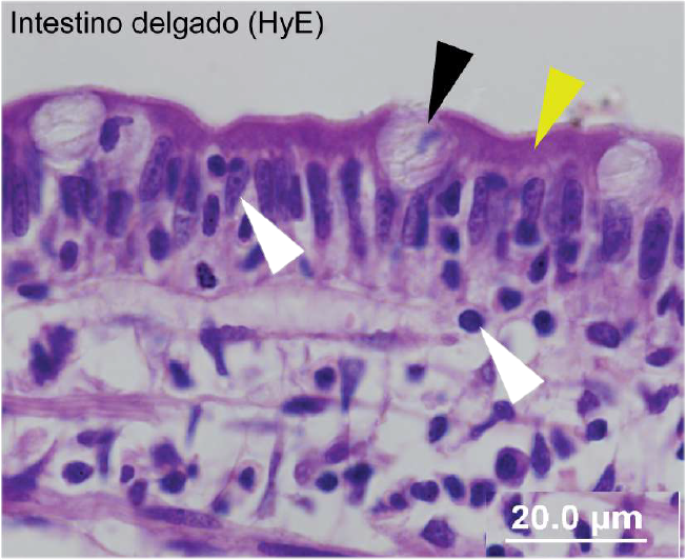

## 3.2  Cambio de tamaño (resolución espacial) y Recorte ("zoom") 

#### Observación: el cambio de tamaño (en general una función resize() implica no solo multiplicar por un factor de escala, sino hacer interpolación para que no haya negros, o promediado o decimación de valores.

**Ejemplo**

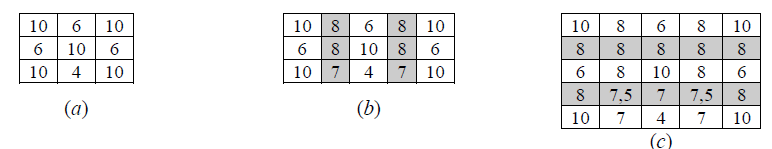

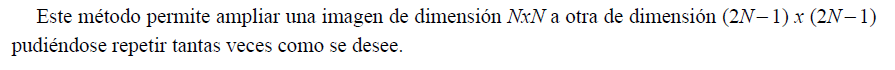

In [6]:
import cv2
Imagen=cv2.imread('lenna.jpg')
Frame=cv2.resize(Imagen,(200,200))#fijo nuevo tamaño
cv2.imshow('Omagen original. Pulse tecla para continuar',Imagen)
cv2.waitKey(0)
cv2.imshow('Escalada, pulse tecla para cerrar',Frame)
cv2.waitKey(0)
cv2.imwrite("Escalada.jpg",Frame)
cv2.destroyAllWindows() #destruye las ventanas creadas

In [7]:
import cv2
Imagen=cv2.imread('lenna.jpg')
crop_img = Imagen[200:400, 100:300] # Corta (crop) x, y, w, h -> 100, 200, 300, 400
# NOTa: Es imagen[y: y + h, x: x + w] and *not* img[x: x + w, y: y + h]
cv2.imshow("Recorte", crop_img) #muestro
cv2.imwrite("Recorte.jpg",crop_img) #guardo a memoria en compu


cv2.waitKey(0)
cv2.destroyAllWindows()

#### Ejercicio: abra en memoria la imagen ortopantomografía2.png y reescálela con tamaño 100x100

#### Escalado con OpenCV fijando interpolación cúbica (considera 16 vecinos)

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('lenna.jpg')
res1 = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
#OR
height, width = img.shape[:2]
res2 = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

cv.imshow('Cambio de tamaño',res1)
cv.waitKey(0) # waits until a key is pressed
cv.destroyAllWindows() # destroys the window showing image

cv.imshow('Cambio de tamaño',res2)
cv.waitKey(0) # waits until a key is pressed
cv.destroyAllWindows() # destroys the window showing image


### Funciones definidas en librería PIL
### Recorte. Rotación.Cambio de tamaño.

**Rotación: Observación**
La rotación con respecto al origen de coordenadas está dada por:

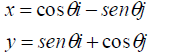

Se requiere conocer el ángulo a rotar y el centro de la rotación.

Si el ángulo rotado no es múltiplo de 90 grados, la imagen resulta recortada. Es necesario hacer alguna interpolación.


In [ ]:
import PIL
from PIL import Image

path="lenna.jpg" #Utilicemos una imagen en que se vea bien la rotación
ima=Image.open(path) #tipo imagen


recorte=(100,100,300,300) #Fijamos esquinas superior izquierda y derecha

imagenrecortada=ima.crop(recorte)

imagenrotada=ima.rotate(45) #Se indica el ángulo girado en grados. Giro antihorario

imagenachicada=ima.resize((100,100))

imagenrecortada.show()
imagenrotada.show()
imagenachicada.show()


In [ ]:
#### Rotación con OpenCV
#### Conserva límites mediante la transformación warpAffine

In [ ]:
import cv2
 
#lee la imagen
img = cv2.imread('lenna.jpg')
# get image height, width
(h, w) = img.shape[:2]

# calculate the center of the image
center = (w / 2, h / 2)

angle45=45 
angle90 = 90
angle180 = 180
angle270 = 270
angle30= 30
 
scale = 0.75 #Probar cambios de escala
 
# Perform the counter clockwise rotation holding at the center
# 90 degrees
M = cv2.getRotationMatrix2D(center, angle90, scale)
rotated90 = cv2.warpAffine(img, M, (h, w))
 
# 180 degrees
M = cv2.getRotationMatrix2D(center, angle180, scale)
rotated180 = cv2.warpAffine(img, M, (w, h))
 
# 270 degrees
M = cv2.getRotationMatrix2D(center, angle270, scale)
rotated270 = cv2.warpAffine(img, M, (h, w))
 
# 45 degrees
M = cv2.getRotationMatrix2D(center, angle45, scale)
rotated45 = cv2.warpAffine(img, M, (h, w))

# 30 degrees
M = cv2.getRotationMatrix2D(center, angle30, scale)
rotated30 = cv2.warpAffine(img, M, (h, w))

cv2.imshow('Original Image',img)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 90 degrees',rotated90)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 180 degrees',rotated180)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 270 degrees',rotated270)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

cv2.imshow('Image rotated by 45 degrees',rotated45)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

cv2.imshow('Image rotated by 30 degrees',rotated30)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image

**Ejercicio- Usar la librería PIL**

Cargar la imagen daisy.jpg.

Mostrar tipo de dato de la imagen y de cada elemento.

Mostrar la imagen.

Convertirla en array y mostrar ahora tipo de dato.

Recortar un rectángulo en el centro. Mostrar el recorte.

Invertir los canales de color. Mostrar la imagen con el cambio de canales de color.

Oscurecer la imagen dividiendo por 2 las intensidades. Mostrar la imagen oscurecida.

Poner color negro en la zona que se recortó.


In [ ]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

path="daisy.jpg"
I=Image.open(path) #tipo imagen
# Se la convierte en array
I_array = np.asarray(I)#'uint8' a color (3D)
print(I_array.shape, type(I_array), type(I_array[0,0,0]))
plt.imshow(I_array)#Se muestra el array con matplotlib
plt.show()

I_array_recortada=I_array[50:150,100:200,:]
#También se puede recortar con PIL
recorte=(50,100,150,200)#Ezquina izquierda superior y derecha inferior
I_recortada=I.crop(recorte)
I_recortada.show()


I_array_falsocolor=I_array[:,:,[1,2,0]]#cambia el orden de los canales de color, rotándolos

print("primer pixel imagen original",I_array[0,0,:])#prueba para ver el cambio en los canales de color
print("primer pixel falso color",I_array_falsocolor[0,0,:])

I_array_oscurecida=I_array[:,:,:]/2 #más oscuro

print(I_array_oscurecida[0:1,0:1,:])
I_array_oscurecida=I_array_oscurecida.astype('uint8') #es importante convertir el tipo de dato

print(I_array_oscurecida[0:1,0:1,:])
print(I_array_oscurecida.shape)

I_array_oscurecidacondefecto=np.copy(I_array_oscurecida)
I_array_oscurecidacondefecto[150:200,100:200,:]=0 #determinar un rectángulo negro dentro de la imagen oscurecida

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(15)
axs[0].imshow(I_array_recortada)
axs[0].set_title("Imagen recortada (zoom)")
axs[1].imshow(I_array_falsocolor)
axs[1].set_title("Imagen completa en falsocolor")
axs[2].imshow(I_array_oscurecidacondefecto)
axs[2].set_title("Oscura con defecto negro")

I_r = Image.fromarray(I_array_recortada) 
I_r.save('flor_recorte.png')
I_fc = Image.fromarray(I_array_falsocolor) 
I_fc.save('flor_falsocolor.png')
I_d = Image.fromarray(I_array_oscurecidacondefecto) 
I_d.save('flor_con_defecto.png')

**Ejercicio**
Codificar una función que reciba una matriz y devuelva una traslación, rellenando con negros.